In [129]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl     
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings 
warnings.filterwarnings('ignore')   
import plotly.express as px


In [130]:
df = pd.read_csv('/Users/mathiasankri/Documents/Final project data analyst churn/archive/CustomerChurn.csv')

In [131]:
df['Total Charges'] = df['Total Charges'].replace(' ', float('nan'))
df['Total Charges'] = df['Total Charges'].astype(float)

In [132]:
df.replace({'Yes': 1, 'No': 0}, inplace=True)
df.head()

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,152148,5575-GNVDE,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,326527,3668-QPYBK,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,845894,7795-CFOCW,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,503388,9237-HQITU,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


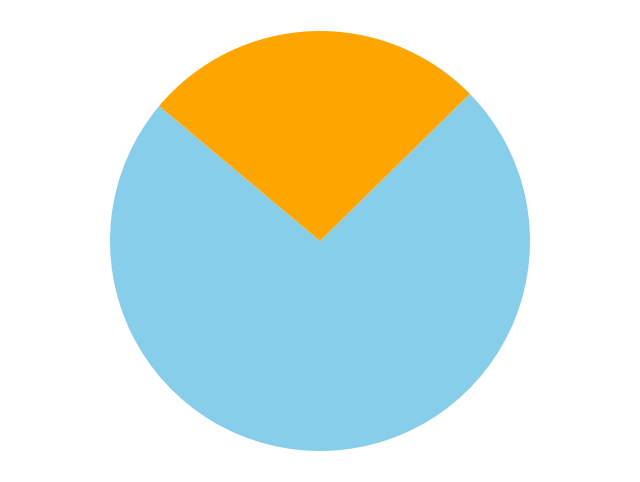

In [133]:
churn_counts = df['Churn'].replace({0: 'No', 1: 'Yes'}).value_counts()
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, colors=['skyblue', 'orange'], startangle=140)
plt.axis('equal')
plt.show()

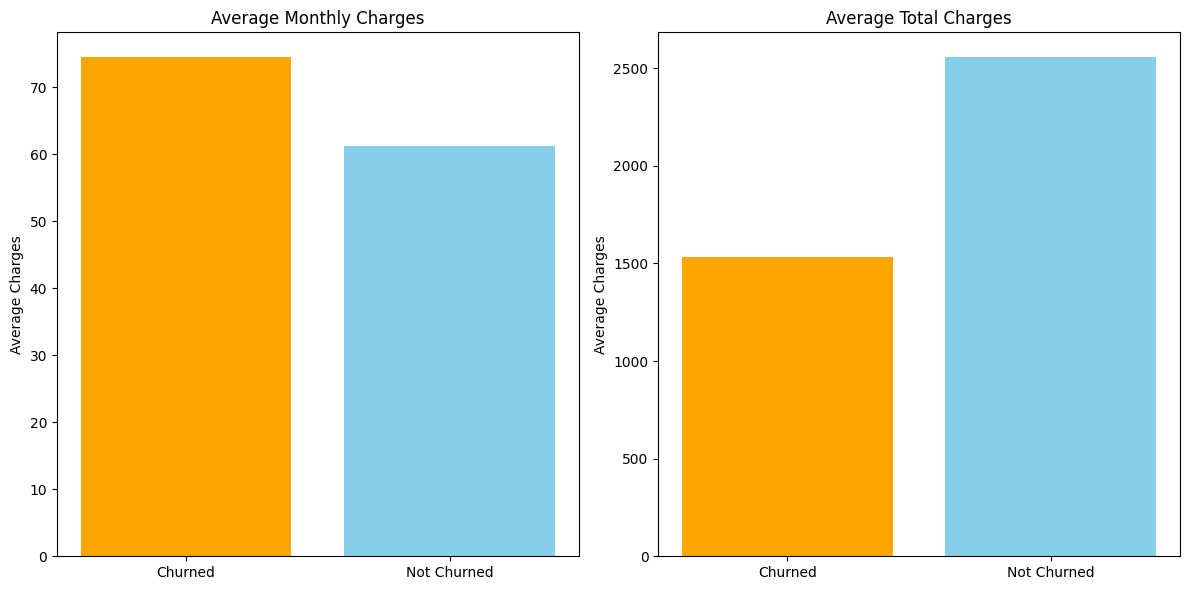

In [134]:
churned_customers = df[df['Churn'] == 1]
not_churned_customers = df[df['Churn'] == 0]
avg_monthly_charges_churned = churned_customers['Monthly Charges'].mean()
avg_monthly_charges_not_churned = not_churned_customers['Monthly Charges'].mean()
avg_total_charges_churned = churned_customers['Total Charges'].mean()
avg_total_charges_not_churned = not_churned_customers['Total Charges'].mean()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(['Churned', 'Not Churned'], [avg_monthly_charges_churned, avg_monthly_charges_not_churned], color=['orange', 'skyblue'])
plt.title('Average Monthly Charges')
plt.ylabel('Average Charges')
plt.subplot(1, 2, 2)
plt.bar(['Churned', 'Not Churned'], [avg_total_charges_churned, avg_total_charges_not_churned], color=['orange', 'skyblue'])
plt.title('Average Total Charges')
plt.ylabel('Average Charges')

plt.tight_layout()
plt.show()

In [135]:
df2 = pd.read_csv('/Users/mathiasankri/Documents/Final project data analyst churn/archive/Telco_customer_churn_demographics.csv')


In [136]:
merged_df = pd.merge(df, df2, how='left', on='Customer ID')
merged_df

,LoyaltyID_x,Customer ID,Senior Citizen_x,Partner_x,Dependents_x,Tenure_x,Phone Service_x,Multiple Lines_x,Internet Service_x,Online Security_x,...,Device Protection_y,Tech Support_y,Streaming TV_y,Streaming Movies_y,Contract_y,Paperless Billing_y,Payment Method_y,Monthly Charges_y,Total Charges_y,Churn_y
0,318537,7590-VHVEG,0,1,0,1,0,No phone service,DSL,0,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,0,0,0,34,1,0,DSL,1,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,0,0,0,2,1,0,DSL,1,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,0,0,0,45,0,No phone service,DSL,1,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,0,0,0,2,1,0,Fiber optic,0,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,810338,6840-RESVB,0,1,1,24,1,1,DSL,1,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,230811,2234-XADUH,0,1,1,72,1,1,Fiber optic,0,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,155157,4801-JZAZL,0,1,1,11,0,No phone service,DSL,1,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,731782,8361-LTMKD,1,1,0,4,1,1,Fiber optic,0,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [137]:
merged_df.dtypes

LoyaltyID_x              int64
Customer ID             object
Senior Citizen_x         int64
Partner_x                int64
Dependents_x             int64
Tenure_x                 int64
Phone Service_x          int64
Multiple Lines_x        object
Internet Service_x      object
Online Security_x       object
Online Backup_x         object
Device Protection_x     object
Tech Support_x          object
Streaming TV_x          object
Streaming Movies_x      object
Contract_x              object
Paperless Billing_x      int64
Payment Method_x        object
Monthly Charges_x      float64
Total Charges_x        float64
Churn_x                  int64
LoyaltyID_y              int64
Senior Citizen_y        object
Partner_y               object
Dependents_y            object
Tenure_y                 int64
Phone Service_y         object
Multiple Lines_y        object
Internet Service_y      object
Online Security_y       object
Online Backup_y         object
Device Protection_y     object
Tech Sup

Is there any correlation between the age and the churn ?

In [138]:
corr_age = merged_df['Age'].corr(merged_df['Churn'])
corr_age

KeyError: 'Age'

In [ ]:
df3 = pd.read_csv('/Users/mathiasankri/Documents/Final project data analyst churn/archive/Telco_customer_churn.csv')
df3

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [ ]:
df3.groupby('Churn Reason')['Monthly Charges'].mean()

Churn Reason
Attitude of service provider                 77.031852
Attitude of support person                   72.816927
Competitor had better devices                72.556538
Competitor made better offer                 76.229286
Competitor offered higher download speeds    74.839153
Competitor offered more data                 76.245370
Deceased                                     68.441667
Don't know                                   72.071753
Extra data charges                           79.708772
Lack of affordable download/upload speed     72.387500
Lack of self-service on Website              72.155114
Limited range of services                    68.755682
Long distance charges                        78.361364
Moved                                        77.943396
Network reliability                          72.791748
Poor expertise of online support             71.402632
Poor expertise of phone support              72.165000
Price too high                               75.4954

In [ ]:
df3['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

In [ ]:
status = pd.read_csv('/Users/mathiasankri/Documents/Final project data analyst churn/archive/Telco_customer_churn_status.csv')
status

,Status ID,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,SWSORB1252,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,SNAEQA8572,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,LMBQNN3714,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,VRZYZI9978,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,FDNAKX1688,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,HNJTLH8249,2569-WGERO,1,Q3,5,Stayed,No,0,45,5306,NaN,NaN
7039,SJJDWW6147,6840-RESVB,1,Q3,3,Stayed,No,0,59,2140,NaN,NaN
7040,AODCBE7865,2234-XADUH,1,Q3,4,Stayed,No,0,71,5560,NaN,NaN
7041,GLQPEW3973,4801-JZAZL,1,Q3,4,Stayed,No,0,59,2793,NaN,NaN


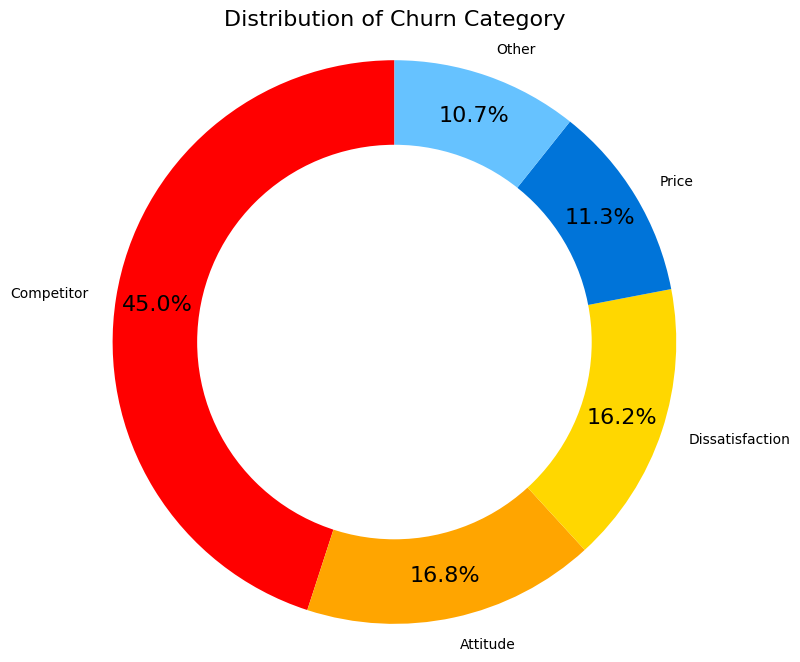

In [ ]:
churn_reason_counts = status.groupby('Churn Category').size().reset_index(name='Count')
churn_reason_counts_sorted = churn_reason_counts.sort_values(by='Count', ascending=False)
top_7_churn_reasons = churn_reason_counts_sorted.head(7)
top_7_churn_reasons

import seaborn as sns
import matplotlib.pyplot as plt

# Data for the donut chart
labels = top_7_churn_reasons['Churn Category']
sizes = top_7_churn_reasons['Count']

# Custom colors closer to orange and blue
colors = ['red', '#FFA500', '#FFD700', '#0074D9', '#66c2ff', '#4682B4', '#4B0082']

# Create pie chart
plt.figure(figsize=(8, 8))
pie = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Draw a circle at the center of the pie to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Title
plt.title('Distribution of Churn Category', fontsize=16)

# Increase the size of the percentages
for text in pie[2]:
    text.set_fontsize(16)

# Display the plot
plt.show()




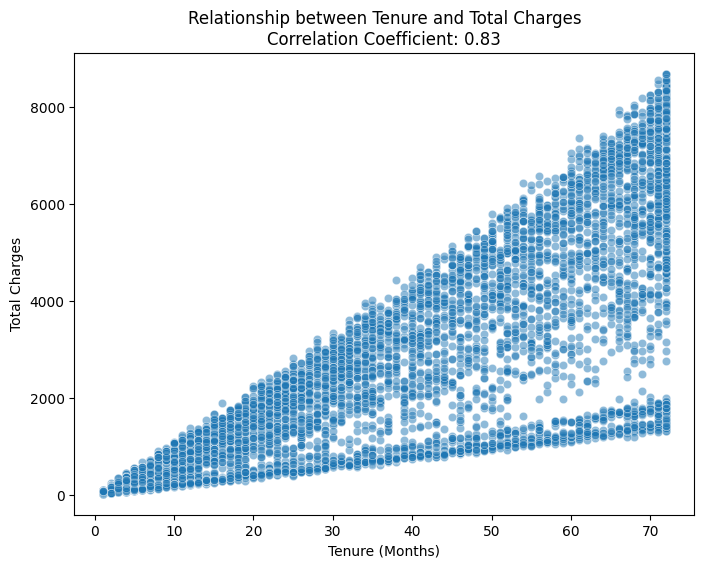

In [ ]:
df['Total Charges'].corr(df['Tenure'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Tenure', y='Total Charges', data=df, alpha=0.5)
plt.title('Relationship between Tenure and Total Charges\nCorrelation Coefficient: {:.2f}'.format(df['Total Charges'].corr(df['Tenure'])))
plt.xlabel('Tenure (Months)')
plt.ylabel('Total Charges')
plt.show()

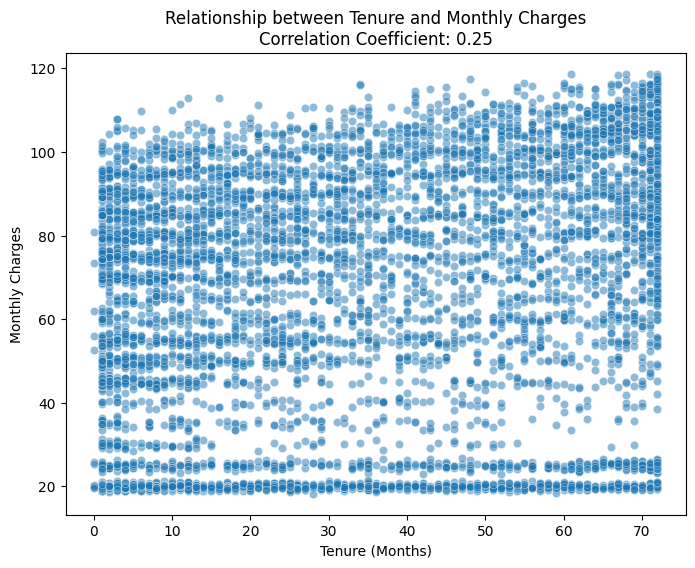

In [ ]:
df['Monthly Charges'].corr(df['Tenure'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Tenure', y='Monthly Charges', data=df, alpha=0.5)
plt.title('Relationship between Tenure and Monthly Charges\nCorrelation Coefficient: {:.2f}'.format(df['Monthly Charges'].corr(df['Tenure'])))
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.show()

In [ ]:
df

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,152148,5575-GNVDE,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,326527,3668-QPYBK,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,845894,7795-CFOCW,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,503388,9237-HQITU,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,810338,6840-RESVB,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,230811,2234-XADUH,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,155157,4801-JZAZL,0,1,1,11,0,No phone service,DSL,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,731782,8361-LTMKD,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


Contract
Month-to-month    3875
One year          1473
Two year          1695
Name: CustomerID, dtype: int64


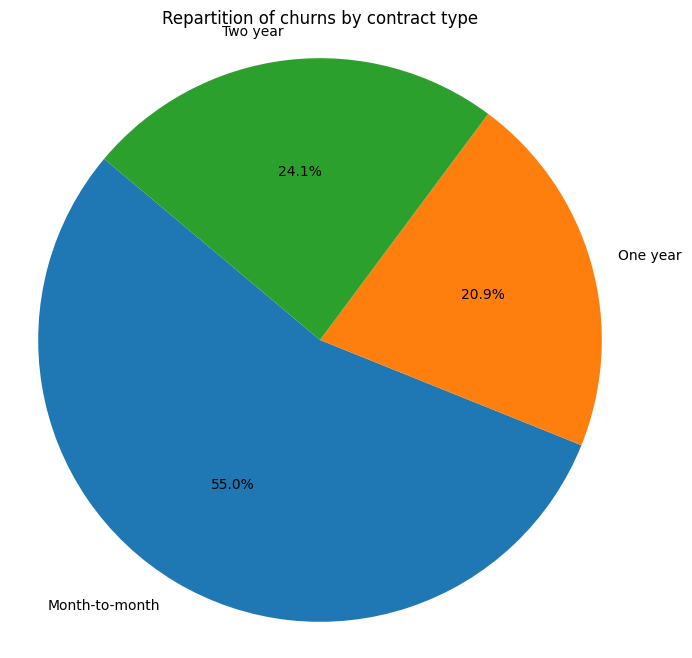

In [ ]:
contract1 = df3.groupby('Contract')['CustomerID'].size()
print(contract1)
plt.figure(figsize=(8, 8))
plt.pie(contract1, labels=contract1.index, autopct='%1.1f%%', startangle=140)
plt.title('Repartition of churns by contract type')
plt.axis('equal')
plt.show()

In [ ]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [ ]:
df3_leaved = df3[df3['Churn Label'] == 'Yes']
df3_leaved

df3_leaved['Return'] = df3_leaved['Churn Score'].apply(lambda x: 'Yes' if x > 75 else 'No')
df3_leaved
df3_leaved['Return'].value_counts()


Return
Yes    1313
No      556
Name: count, dtype: int64

In [141]:
df3['Churn

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
